<a href="https://colab.research.google.com/github/AhmedWael2000/Optimizers/blob/main/Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading mnist from Keras

11490434/11490434 [==============================] - 0s 0us/step


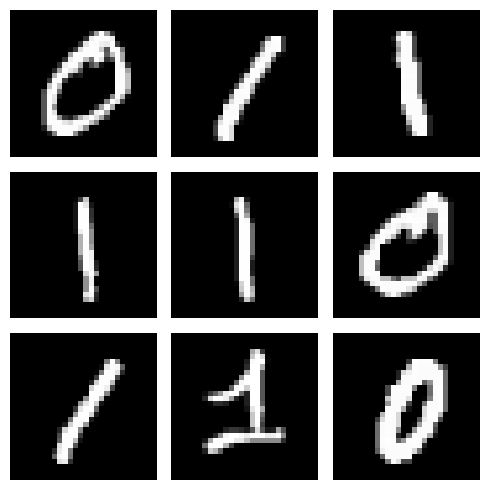

In [ ]:
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train=x_train[np.where(y_train<2 )]
x_test=x_test[np.where(y_test<2 )]

y_train=y_train[np.where(y_train<2 )]
y_test=y_test[np.where(y_test <2)]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap='gray')
    # ax.set_title(f'Label: {train_labels[indexes[i]]}')
    ax.axis('off')
plt.tight_layout()



#flatten the training data

In [ ]:

x_train=x_train.reshape(12665,-1)
print('x_train shape:', x_train.shape)


x_train shape: (12665, 784)


#normalizing training data

In [ ]:
# x_train=x_train/255.0
mean=np.mean(x_train,axis=0)
std=np.std(x_train,axis=0)+1e-5
x_train=(x_train - mean)/std


#Sigmoid Function and cross entropy fuction


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigCost(y,y_hat):
  y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)
  return np.mean( - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

#logistic function with lasso L1 optimizer

In [ ]:
def lasso(X, y, w, b, l, iter,lambda_val):

  y=y.reshape(-1,1)
  cost=[]
  for j in range(iter):
    # print some stats during training

    z = np.dot(X,w.T)+b
    alphaZ=sigmoid(z)
    cost.append(sigCost(y,alphaZ))
    l1= l * lambda_val * np.sign(w)
    w += (l*np.dot((y - alphaZ).T, X)/len(X))+l1
    b += l*np.sum((y - alphaZ))/len(X)

    # if j %(iter/10)==0:
    #   print(f"iter: {j} b:{b} cost:{cost[-1]}")

  return w, b,cost

#accuracy

In [ ]:
def accuracy(y,y_hat):
  y_hat=np.round(y_hat).flatten()
  y=np.round(y).flatten()

  return (y==y_hat).sum()/y.size



#implementing KFold cross Validation

In [ ]:
import random as rd
def kfold(x_train,y_train,shuffle=True,k=10):
  indx=list(range(len(x_train)))
  if shuffle:
    rd.shuffle(indx)
  folds=np.array_split(indx,k)  
  pairs=[]
  for i in range(k):
    train=folds[i]
    val=np.concatenate(np.delete(folds,i,axis=0))
    pairs.append((train,val))
  return pairs

pairs=kfold(x_train,y_train,shuffle=True,k=10)   
pairs[0][0].shape,pairs[0][1].shape

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


((1267,), (11398,))

#When $\lambda$ is 0

In [ ]:
train_acc=[]
val_acc_1=[]
for train, val in pairs:
  w = np.random.randn(1, 28*28)
  b = np.zeros(1)
  
  w, b,cost = lasso(x_train[train], y_train[train], w, b, l=0.3, iter=100,lambda_val=0)
    
  train_acc.append(accuracy(y_train[train],sigmoid(np.dot(x_train[train],w.T)+b)))

  val_acc_1.append(accuracy(y_train[val],sigmoid(np.dot(x_train[val],w.T)+b)))
  
"average train accuracy: ",sum(train_acc)/len(train_acc),"average validation accuracy: " ,sum(val_acc_1)/len(val_acc_1)


('average train accuracy: ',
 0.9958944453380315,
 'average validation accuracy: ',
 0.9836645426287227)

#When $\lambda$ is 0.02

In [ ]:
train_acc=[]
val_acc_3=[]
for train, val in pairs:
  w = np.random.randn(1, 28*28)
  b = np.zeros(1)
  w, b,cost = lasso(x_train[train], y_train[train], w, b, l=0.3, iter=100,lambda_val=0.02)
    
  train_acc.append(accuracy(y_train[train],sigmoid(np.dot(x_train[train],w.T)+b)))

  val_acc_3.append(accuracy(y_train[val],sigmoid(np.dot(x_train[val],w.T)+b)))
  
"average train accuracy: ",sum(train_acc)/len(train_acc),"average validation accuracy: " ,sum(val_acc_3)/len(val_acc_3)


<ipython-input-5-e20d63e1c11c>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


('average train accuracy: ',
 0.9891043888425471,
 'average validation accuracy: ',
 0.976724977229696)

#When $\lambda$ is 0.2

In [ ]:
train_acc=[]
val_acc_4=[]
for train, val in pairs:
  w = np.random.randn(1, 28*28)
  b = np.zeros(1)
    
  w, b,cost = lasso(x_train[train], y_train[train], w, b, l=0.3, iter=100,lambda_val=0.2)
  train_acc.append(accuracy(y_train[train],sigmoid(np.dot(x_train[train],w.T)+b)))

  val_acc_4.append(accuracy(y_train[val],sigmoid(np.dot(x_train[val],w.T)+b)))
  
"average train accuracy: ",sum(train_acc)/len(train_acc),"average validation accuracy: " ,sum(val_acc_4)/len(val_acc_4)


<ipython-input-5-e20d63e1c11c>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


('average train accuracy: ',
 0.935175140989338,
 'average validation accuracy: ',
 0.9282012159524712)

#Comparing Validation Accuracy for each Case

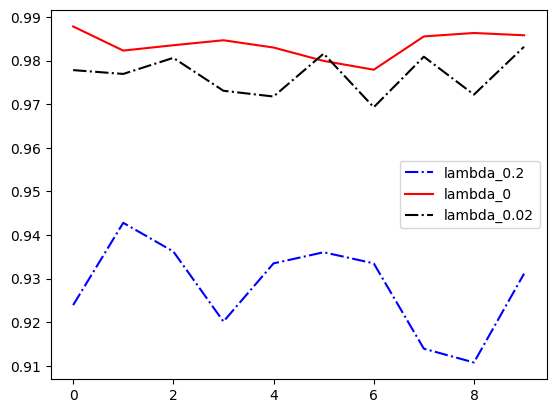

In [ ]:
# create sample data
x = np.linspace(0,9,10)
y1 = val_acc_1
y3 = val_acc_3
y4=val_acc_4
# plot the data
plt.plot(x, y4, color='blue', linestyle='-.', label='lambda_0.2')
plt.plot(x, y1, color='red', linestyle='-', label='lambda_0')
plt.plot(x, y3, color='black', linestyle='-.', label='lambda_0.02')

plt.legend()

#Visualizing using Plotly library

In [ ]:
lists={
    'lambda_0.2':y4,
    'lambda_0':y1,
    'lambda_0.02':y3,
    'x':x
      }
data=pd.DataFrame(lists)
df = pd.melt(data, id_vars=['x'], var_name='line', value_name='y')
# df

In [ ]:
import plotly.express as px
fig = px.line(df, x='x', y='y', color='line',markers=True)
fig.show()


#logistic function with mini-batch gradient descent with momintum



In [ ]:
def mini_batch(X, y, w, b, l, iter,batch_size=500):
  m,n = X.shape
  y=y.reshape(-1,1)
  cost=[]
  num_batches= m//batch_size
  v_dw=0
  v_db=0
  for j in range(iter):

    shuffled_indices = np.random.permutation(m)
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for batch in range(num_batches):
      start_indx= batch*batch_size
      end_indx= start_indx + batch_size
        
      z = np.dot(X_shuffled[start_indx:end_indx],w.T)+b
      alphaZ=sigmoid(z)
      cost.append(sigCost(y_shuffled[start_indx:end_indx],alphaZ))
      v_dw=0.1*v_dw+0.9*(np.dot((alphaZ-y_shuffled[start_indx:end_indx]).T, X_shuffled[start_indx:end_indx])/batch_size)
      w -= l*v_dw/(1-0.9**(j+1))
      v_db=(0.1*v_db+0.9*np.sum((alphaZ-y_shuffled[start_indx:end_indx]))/batch_size)
      b -= l*v_db/(1-0.9**(j+1))

      # if j %(iter/10)==0:
      #   print(f"iter: {j} b:{b} cost:{cost[-1]}")

  return w, b,cost

In [ ]:
train_acc=[]
momentum=[]
for train, val in pairs:
  w = np.random.randn(1, 28*28)
  b = np.zeros(1)
    
  w, b,cost = mini_batch(x_train[train], y_train[train], w, b, l=0.3, iter=10)
  train_acc.append(accuracy(y_train[train],sigmoid(np.dot(x_train[train],w.T)+b)))

  momentum.append(accuracy(y_train[val],sigmoid(np.dot(x_train[val],w.T)+b)))
  
"average train accuracy: ",sum(train_acc)/len(train_acc),"average validation accuracy: " ,sum(momentum)/len(momentum)


('average train accuracy: ',
 0.9947096735580934,
 'average validation accuracy: ',
 0.9898320135056778)

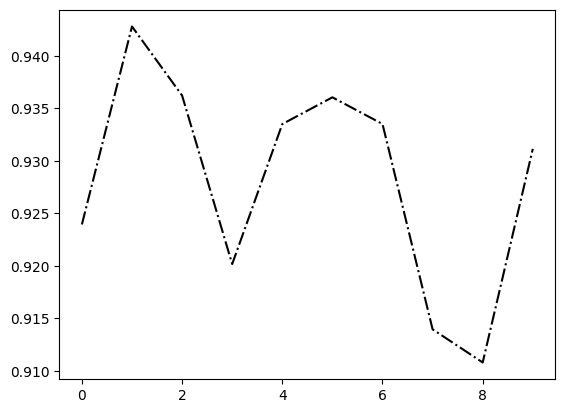

In [ ]:
plt.plot(x, val_acc_4, color='black', linestyle='-.', label='lambda_0.02')


#logistic function with mini-batch gradient descent with RMS Prop



In [ ]:
def RMS(X, y, w, b, l, iter,batch_size=500):
  m,n = X.shape
  y=y.reshape(-1,1)
  cost=[]
  num_batches= m//batch_size
  s_dw=0
  s_db=0
  for j in range(iter):

    shuffled_indices = np.random.permutation(m)
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for batch in range(num_batches):
      start_indx= batch*batch_size
      end_indx= start_indx + batch_size
        
      z = np.dot(X_shuffled[start_indx:end_indx],w.T)+b
      alphaZ=sigmoid(z)
      cost.append(sigCost(y_shuffled[start_indx:end_indx],alphaZ))

      w_dw=(np.dot((alphaZ-y_shuffled[start_indx:end_indx]).T, X_shuffled[start_indx:end_indx])/batch_size)
      b_db=np.sum((alphaZ-y_shuffled[start_indx:end_indx]))/batch_size
      s_dw=(0.9*s_dw+0.1*w_dw**2)
      w -= l*w_dw/(np.sqrt(s_dw)+1e-8)
      s_db=(0.9*s_db+0.1*b_db**2)
      b -= l*b_db/(np.sqrt(s_db)+1e-8)

      # if j %(iter/10)==0:
      #   print(f"iter: {j} b:{b} cost:{cost[-1]}")

  return w, b,cost

In [ ]:
train_acc=[]
rms=[]
for train, val in pairs:
  w = np.random.randn(1, 28*28)
  b = np.zeros(1)
    
  w, b,cost = RMS(x_train[train], y_train[train], w, b, l=0.3, iter=100)
  train_acc.append(accuracy(y_train[train],sigmoid(np.dot(x_train[train],w.T)+b)))

  rms.append(accuracy(y_train[val],sigmoid(np.dot(x_train[val],w.T)+b)))
  
"average train accuracy: ",sum(train_acc)/len(train_acc),"average validation accuracy: " ,sum(rms)/len(rms)


<ipython-input-5-e20d63e1c11c>:2: RuntimeWarning:

overflow encountered in exp



('average train accuracy: ',
 1.0,
 'average validation accuracy: ',
 0.9898144173087344)

#logistic function with mini-batch gradient descent with Adam



In [ ]:
def adam(X, y, w, b, l, iter,batch_size=500):
  m,n = X.shape
  y=y.reshape(-1,1)
  cost=[]
  num_batches= m//batch_size
  s_dw=0
  s_db=0
  for j in range(iter):

    shuffled_indices = np.random.permutation(m)
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for batch in range(num_batches):
      start_indx= batch*batch_size
      end_indx= start_indx + batch_size
        
      z = np.dot(X_shuffled[start_indx:end_indx],w.T)+b
      alphaZ=sigmoid(z)
      cost.append(sigCost(y_shuffled[start_indx:end_indx],alphaZ))

      w_dw=(np.dot((alphaZ-y_shuffled[start_indx:end_indx]).T, X_shuffled[start_indx:end_indx])/batch_size)
      b_db=np.sum((alphaZ-y_shuffled[start_indx:end_indx]))/batch_size
      
      s_dw=(0.9*s_dw+0.1*w_dw**2)/(1-0.9**(j+1))
      s_db=(0.9*s_db+0.1*b_db**2)/(1-0.9**(j+1))
      
      v_dw=(0.9*v_dw+0.1*w_dw**2)/(1-0.9**(j+1))
      v_db=(0.9*v_db+0.1*b_db**2)/(1-0.9**(j+1))
      
      w -= l*v_dw/(np.sqrt(s_dw)+1e-8)
      b -= l*v_db/(np.sqrt(s_db)+1e-8)

      # if j %(iter/10)==0:
      #   print(f"iter: {j} b:{b} cost:{cost[-1]}")

  return w, b,cost

In [ ]:
train_acc=[]
adam=[]
for train, val in pairs:
  w = np.random.randn(1, 28*28)
  b = np.zeros(1)
    
  w, b,cost = mini_batch(x_train[train], y_train[train], w, b, l=0.3, iter=10)
  train_acc.append(accuracy(y_train[train],sigmoid(np.dot(x_train[train],w.T)+b)))

  adam.append(accuracy(y_train[val],sigmoid(np.dot(x_train[val],w.T)+b)))
  
"average train accuracy: ",sum(train_acc)/len(train_acc),"average validation accuracy: " ,sum(adam)/len(adam)


('average train accuracy: ',
 0.9939205322620263,
 'average validation accuracy: ',
 0.9879895742340693)

## comparing adam, mommentum and rms

In [ ]:
lists={
    'adam':adam,
    'momentum':momentum,
    'rms':rms,
    'x':x
      }
data=pd.DataFrame(lists)
df = pd.melt(data, id_vars=['x'], var_name='line', value_name='y')
df.head(20)

,x,line,y
0,0.0,adam,0.981400
1,1.0,adam,0.990612
2,2.0,adam,0.988507
3,3.0,adam,0.985436
4,4.0,adam,0.985612
5,5.0,adam,0.987894
6,6.0,adam,0.987455
7,7.0,adam,0.991227
8,8.0,adam,0.990525
9,9.0,adam,0.991227


In [ ]:
import plotly.express as px
fig = px.line(df, x='x', y='y', color='line',markers=True)
fig.show()